# Chem 30324, Spring 2025, Homework 10


# Due April 26, 2025

## Reactions from scratch
### In 1996, Schneider and co-workers used DFT to compute the reaction pathway for unimolecular decomposition of trifluoromethanol, a reaction of relevance to the atmospheric degradation of hydrofluorocarbon refrigerants (*J. Phys. Chem.* **1996**, *100*, 6097- 6103, [doi:10.1021/jp952703m](https://pubs.acs.org/doi/abs/10.1021/jp952703m)): $$\mathsf{CF_3OH\rightarrow COF_2 + HF}$$
### Following are some of the reported results, computed at 298 K:

|              | CF$_3$OH| C(O)F$_2$ | HF |    |
|:--------------|---------:|-----------:|----:|----:|
| $E^\text{elec}$ | -412.90047 | -312.57028 | -100.31885 | (Hartree) |
| ZPE             | 0.02889 | 0.01422 | 0.00925 | (Hartree) |
| $U^\text{vib}$ | 4.3 | 1.2 | 0 |  (kJ mol$^{-1}$) |
| $q^{\text{trans}}/V$ | $7.72\times 10^{32}$ | $1.59\times 10^{32}$ |$8.65\times 10^{31}$ | (m$^{-3}$) |
| $q^\text{rot}$ | 61830 | 679 | 9.59 | unitless |
| $q^\text{vib}$ | 2.33 | 1.16 | 1 | unitless |

### 1. Compute $\Delta \bar{U}^\text{trans}$(298 K) in kJ/mol.

In [177]:
# Constants
R = 8.3145  # J/mol·K
T = 298     # K

# Translational energy per mole
U_trans = (3/2) * R * T  # in J/mol
U_trans_kJmol = U_trans / 1000  # convert to kJ/mol

# Mole count: 1 reactant → 2 products
n_reactants = 1
n_products = 2

# ΔU_trans calculation
delta_U_trans = (n_products - n_reactants) * U_trans_kJmol

print(f"ΔU_trans (298 K) = {delta_U_trans:.3f} kJ/mol")

ΔU_trans (298 K) = 3.717 kJ/mol


### 2. Compute $\Delta \bar{U}^\text{rot}$(298 K) in kJ/mol. *Don't forget that HF is linear!*

In [178]:

# Rotational energy (J/mol)
U_rot_nonlinear = (3/2) * R * T
U_rot_linear = R * T

# ΔU_rot = (COF2 + HF) - (CF3OH)
delta_U_rot = (U_rot_nonlinear + U_rot_linear) - U_rot_nonlinear
delta_U_rot_kJmol = delta_U_rot / 1000  # Convert to kJ/mol

print(f"ΔU_rot (298 K) = {delta_U_rot_kJmol:.3f} kJ/mol")

ΔU_rot (298 K) = 2.478 kJ/mol


### 3. Combine your answers with the table to determine $\Delta \bar{U}^{\circ}$(298 K), in kJ mol$^{-1}$.   

In [179]:
hartree_to_kjmol = 2625.5  # Conversion factor
# Vibrational contribution (from table)
U_vib_CF3OH = 4.3   # kJ/mol
U_vib_COF2 = 1.2    # kJ/mol
U_vib_HF = 0.0      # kJ/mol
delta_U_vib = (U_vib_COF2 + U_vib_HF) - U_vib_CF3OH

# Electronic + ZPE (from table, in Hartree)
E_CF3OH = -412.90047 + 0.02889
E_COF2 = -312.57028 + 0.01422
E_HF = -100.31885 + 0.00925
delta_E_elec_ZPE_hartree = (E_COF2 + E_HF) - E_CF3OH
delta_E_elec_ZPE_kjmol = delta_E_elec_ZPE_hartree * hartree_to_kjmol

# Total internal energy change
delta_U_total = delta_U_trans + delta_U_rot_kJmol + delta_U_vib + delta_E_elec_ZPE_kjmol

print(f"ΔE+ZPE       = {delta_E_elec_ZPE_kjmol:.3f} kJ/mol")
print(f"Total ΔU     = {delta_U_total:.3f} kJ/mol")

ΔE+ZPE       = 15.543 kJ/mol
Total ΔU     = 18.637 kJ/mol


### 4. Determine $\Delta \bar{H}^{\circ}$(298 K), in kJ mol$^{-1}$, assuming all species are ideal gases.

In [180]:


# Enthalpy: ΔH = ΔU + RTΔn
delta_n = 2 - 1
delta_H = delta_U_total + (R * T * delta_n) / 1000  # kJ/mol

# Output
print(f"ΔH (298 K)   = {delta_H:.3f} kJ/mol")

ΔH (298 K)   = 21.115 kJ/mol


### 5. Determine  $\Delta \bar{G}^{\circ}$(298 K) in kJ mol$^{-1}$, assuming ideal behavior and 1 bar standard state.  Recall that $\bar{G}^\circ=E^\mathsf{elec} + \mathsf{ZPE}-RT\ln(q^\circ)$, where $q^\circ = ((q^\mathsf{trans}/V)q^\mathsf{rot}q^\mathsf{vib})/c^\circ$ and $c^\circ = P^\circ/RT$.

In [181]:
import numpy as np

P = 1 #bar
T = 298 #K
R_bar = 0.0831446261815324 #L bar/(K mol) we'll need to make sure our Volume units match
c0 = P/(R_bar*T) #has units of L/mol
Na = 6.022e23 #Avogadro's number
R_J = 8.314 # J / K mol

CF3OH_qtransV = 7.72e32/(Na*1000) #need to convert from 1 molecule/m3 to mol/L for all qtransV values
CF3OH_qrot    = 61830
CF3OH_qvib    = 2.33
CF3OH_q0      = CF3OH_qtransV*CF3OH_qrot*CF3OH_qvib/c0
#Converting given hartrees to kJ/mol
CF30H_G0      = (-412.90047 + 0.02889)*2626.5 - R_J*T*np.log(CF3OH_q0)/1000 #Gibbs free energy in kJ/mol

COF2_qtransV  = 1.59e32/(Na*1000)
COF2_qrot     = 679
COF2_qvib     = 1.16
COF2_q0       = COF2_qtransV*COF2_qrot*COF2_qvib/c0
COF2_G0       = (-312.57028 + 0.01422)*2626.5 - R_J*T*np.log(COF2_q0)/1000

HF_qtransV    = 8.65e31/(Na*1000)
HF_qrot       = 9.59
HF_qvib       = 1
HF_q0         = HF_qtransV*HF_qrot*HF_qvib/c0
HF_G0         = (-100.31885 + 0.00925)*2626.5 - R_J*T*np.log(HF_q0)/1000

dG = (-CF30H_G0 + COF2_G0 + HF_G0)
print(f"dG = {dG:.2f} kJ/mol")

dG = -10.61 kJ/mol


### 6. Determine $\Delta \bar{S}^{\circ}$(298 K), in J mol$^{-1}$ K$^{-1}$ , assuming a 1 bar standard state. Recall that $S = (H -
G)/T$.

In [182]:
dS       = (delta_H-dG)/T*1000#converting from kJ/mol K to J/mol K
print(f"dS = {dS:.2f} J/mol K")

dS = 106.45 J/mol K


### 7. Using the data provided, determine $K_p$ (298 K), assuming a 1 bar standard state.

Equation is given in lecture 14 - Reactions

\begin{equation}
K_p(T)=e^{-\Delta G^o(T)/RT}
\end{equation}

In [183]:
#print(R)
#print(T)
#print(dG)

Kp=np.exp(-dG*1000/(R*T)) #dG is in kJ/mol so we multiply by 1000 to convert to J/mol
print(f"Kp = {Kp:2f}")

Kp = 72.279693


### 8. 1 bar of CF$_3$OH is introduced into a 20 L vessel at 298 K and left long enough to come to equilibrium with respect to its decomposition reaction. What is the composition of the gas mixture (mole fractions of all the components) at equilibrium?

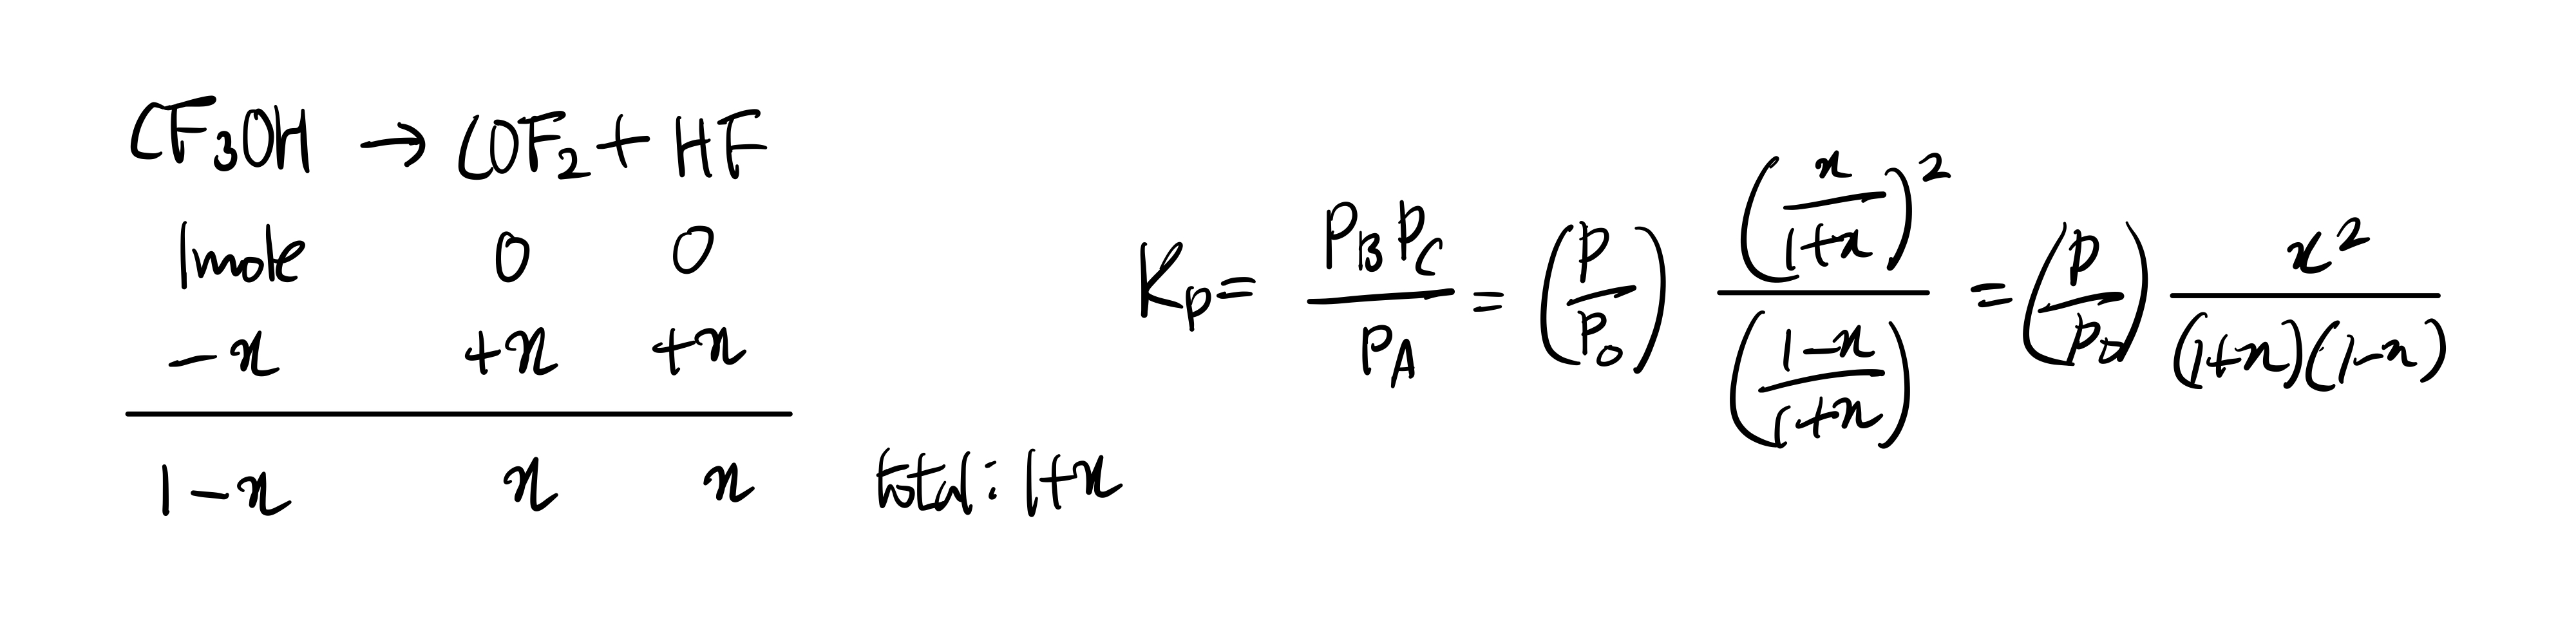

In [184]:
import numpy as np
from sympy import *

#First, calculating the number of moles with given pressure volume and temperature, making sure to use correct units
n0=1*20/(0.0831446261815324*298)
print(f"initial moles of CF3OH = {n0:2f} moles")


x = symbols('x',positive=True)
c = solve(x**2-(n0-x)*(n0+x)*Kp,x)
print(c[0])

tot = n0+c[0]
print('At equilibrium the corresponding molar fractions are: CF3OH = %.5f, COF2 = %.5f, HF = %.5f.'%((n0-c[0])/tot,c[0]/tot,c[0]/tot))
print('At equilibrium the corresponding concentrations are: CF3OH = %.5f mol/L, COF2 = %.5f mol/L, HF = %.5f. mol/L'%((n0-c[0])/20,c[0]/20,c[0]/20))

initial moles of CF3OH = 0.807197 moles
0.801670449939499
At equilibrium the corresponding molar fractions are: CF3OH = 0.00344, COF2 = 0.49828, HF = 0.49828.
At equilibrium the corresponding concentrations are: CF3OH = 0.00028 mol/L, COF2 = 0.04008 mol/L, HF = 0.04008. mol/L


### 9. How, directionally, would your answer to Question 8 change if the vessel was at a higher temperature? Provide a sketch incorporating the Boltzmann distribution to rationalize your answer.

Reaction is endothermic, so product states are higher in energy than reactants. As T increases, Boltzmann distribution favors higher energy things. Thus, at higher temperature, equilibrium shifts towards reactants.

### 10. Use the van'T Hoff relationship to determine the equilibrium constant and equilibrium mole fractions at 273 and 323 K.

The Van't Hoff equation states:

$ln\frac{K(T_2)}{K(T_1)}=\frac{-\Delta H^o}{R}(\frac{1}{T_2}-\frac{1}{T_1})$

In [185]:
import numpy as np
from sympy import *

K1 = 72.323552 # from Q7
dH = 21.115 # kJ/mol from Q4
R = 8.314 # J/mol
n0=1*20/(0.0831446261815324*298)
print(f"initial moles of CF3OH = {n0:2f} moles")

initial moles of CF3OH = 0.807197 moles


In [186]:
T1 = 298 #K
T2 = 273 #K
K2 = K1*np.exp(-dH*1000/R*(1/T2-1/T1))
print(f'K=', round(K2,4), 'at %3i K.'%(T2))

x = symbols('x',positive=True)
c = solve(x**2-(n0-x)*(n0+x)*K2,x)
print(c)

tot = n0+c[0]
print('At equilibrium the corresponding molar fractions are: CF3OH = %.5f, COF2 = %.5f, HF = %.5f.'%((n0-c[0])/tot,c[0]/tot,c[0]/tot))

K= 33.1388 at 273 K.
[0.795286868570136]
At equilibrium the corresponding molar fractions are: CF3OH = 0.00743, COF2 = 0.49628, HF = 0.49628.


In [187]:
T1 = 298 #K
T2 = 323 #K
K2 = K1*np.exp(-dH*1000/R*(1/T2-1/T1))
print(f'K=', round(K2,4), 'at %3i K.'%(T2))

x = symbols('x',positive=True)
c = solve(x**2-(n0-x)*(n0+x)*K2,x)
print(c)

tot = n0+c[0]
print('At equilibrium the corresponding molar fractions are: CF3OH = %.5f, COF2 = %.5f, HF = %.5f.'%((n0-c[0])/tot,c[0]/tot,c[0]/tot))

K= 139.8797 at 323 K.
[0.804327066520025]
At equilibrium the corresponding molar fractions are: CF3OH = 0.00178, COF2 = 0.49911, HF = 0.49911.


at higher temperature, the mole fractions of products increases

### 11. How, directionally, would your answer to Question 8 change if the vessel was compressed to a smaller volume? Rationalize your answer in terms of partition functions.

In our case, we have two products and one reactants. If the volume decreases, there is less space for molecules to explore, delta S_trans becomes less positive, equilibrium shifts towards reactants.

### 12. Check your answer to Question 11 by computing the equilibrium composition after compressing the vessel to 5 L.

K_p = $\frac{P}{P^0}$$\frac{x^2}{(1+x)(1-x)}$

P here is 4 bar because we compressed the volume by a factor of 4

At 298 K, Kp = 72.323552 (from problem 7)

In [190]:
import numpy as np
from sympy import *

#we still have the same initial moles
n0=4*5/(0.0831446261815324*298)
print(f"initial moles of CF3OH = {n0:2f} moles")


x = symbols('x',positive=True)
c = solve(4*x**2-(n0-x)*(n0+x)*Kp,x) # 4 comes from P = 4 bar in this problem

tot = n0+c[0]
print('At equilibrium the corresponding molar fractions are: CF3OH = %.5f, COF2 = %.5f, HF = %.5f.'%((n0-c[0])/tot,c[0]/tot,c[0]/tot))
print('Mole fraction for CF3OH increases from 0.11 in Q8 to 0.12, concluding that smaller volumes favor hvaing less species side (reactant side in this problem)')

initial moles of CF3OH = 0.807197 moles
At equilibrium the corresponding molar fractions are: CF3OH = 0.01347, COF2 = 0.49327, HF = 0.49327.
Mole fraction for CF3OH increases from 0.11 in Q8 to 0.12, concluding that smaller volumes favor hvaing less species side (reactant side in this problem)


### 13. Consult a thermodynamics source (e.g. https://webbook.nist.gov/chemistry/) to determine $\Delta H^\circ$(298 K), $\Delta S^\circ$(298 K), and $\Delta G^\circ$(298 K) for the homologous reaction CH$_3$OH (g)$\rightarrow$ H$_2$ (g) + H$_2$CO (g).  Does the substitution of F by H make the reaction lean more or less towards products?

In [189]:
T = 298 #K
#All values were taken from NIST

#Methanol
Hm = -205 #kJ/mol
Sm = .2399 #kJ/mol K
Gm = Hm - T*Sm #kJ/mol

#Hydrogen
Hh = 0
Sh = .13068 #J/mol K
Gh = Hh - T*Sh #kJ/mol

#Formaldehyde
Hf = -108.6 #kJ/mol
Sf = .21895 #kJ/mol K
Gf = Hf - T*Sf #kJ/mol


delta_H = Hf+Hh-Hm #kJ/mol
delta_S = Sf+Sh-Sm #kJ/mol K
delta_G = Gf+Gh-Gm #kJ/mol

print('Delta H =',delta_H,'kJ/mol.')
print('Delta S =',delta_S,'kJ/mol K.')
print('Delta G =',delta_G,'kJ/mol.')

print('Therefore, by substituting F with H makes the reaction less favorable.')

Delta H = 96.4 kJ/mol.
Delta S = 0.10973 kJ/mol K.
Delta G = 63.70046000000002 kJ/mol.
Therefore, by substituting F with H makes the reaction less favorable.
